In [2]:
import glob
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL.ImageOps as ImOps

Preproccesing

In [3]:
def persiapan_dataset(path):
    x_latih=[]
    y_latih=[]
    kode = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            kode = 0
        elif labels == 'ca':
            kode = 1
        elif labels == 'ta':
            kode = 2
        elif labels == 'pa':
            kode = 3
        elif labels == 'ya':
            kode = 4
        elif labels == 'wa':
            kode = 5
        elif labels == 'ga':
            kode = 6
        elif labels == 'ja':
            kode = 7
        elif labels == 'da':
            kode = 8
        elif labels == 'ba':
            kode = 9
        elif labels == 'ra':
            kode = 10
        elif labels == 'sa':
            kode = 11
        elif labels == 'nga':
            kode = 12
        elif labels == 'nya':
            kode = 13
        elif labels == 'na':
            kode = 14
        elif labels == 'ma':
            kode = 15
        elif labels == 'la':
            kode = 16
        elif labels== 'ha':
            kode = 17
            
        semua_images_path = glob.glob(path+labels+'/*.jpg')
        for img_path in semua_images_path :
                img=load_img(img_path, target_size=(64,64))
                img=img_to_array(img)
                img=img/255.0
                x_latih.append(img)
                y_latih.append(kode)
    return np.array(x_latih),np.array(y_latih)

In [4]:
x_latih, y_latih = persiapan_dataset('train-set/')
x_val, y_val = persiapan_dataset('test-set/')

In [5]:
print("Shape x_train :",x_latih.shape)
print("Shape y_train:", y_latih.shape)
print(" Shape x_val :",x_val.shape)
print("Shape y_val:", y_val.shape)

Shape x_train : (575, 64, 64, 3)
Shape y_train: (575,)
 Shape x_val : (144, 64, 64, 3)
Shape y_val: (144,)


In [6]:
from keras.preprocessing.image import ImageDataGenerator
import dataaug

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)

datagen.fit(x_latih, augment=True)
data_test = datagen.flow(x_latih, y_latih, batch_size=5)

Train Augmetasi Data


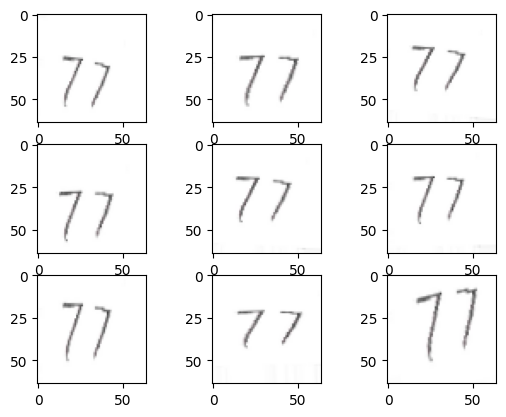

In [7]:
from numpy import expand_dims
import matplotlib.pyplot as plt

img = x_latih[215]
samples = expand_dims(img, 0)
it = datagen.flow(samples, batch_size=1)
print("Train Augmetasi Data")
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

In [9]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam

def modelLeNet():
    model = Sequential()

    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))

    model.add(Conv2D(48, (5, 5), activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(120, (5, 5), activation='relu'))

    model.add(Flatten())

    model.add(Dense(256, activation= 'relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(18, activation = 'softmax'))
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model

modelLeNet().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 48)        38448     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 120)         144120    
                                                                 
 flatten_2 (Flatten)         (None, 9720)             

c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
LeNet_Aug = modelLeNet()
LeNet_non_Aug = modelLeNet()

In [11]:
history_nonAug = LeNet_non_Aug.fit(x_latih,y_latih,epochs=15,validation_data=(x_val,y_val))

Epoch 1/15
18/18 [==============================] - 5s 222ms/step - loss: 2.9077 - acc: 0.0313 - val_loss: 2.8912 - val_acc: 0.0556
Epoch 2/15
18/18 [==============================] - 3s 175ms/step - loss: 2.8910 - acc: 0.0591 - val_loss: 2.8869 - val_acc: 0.0556
Epoch 3/15
18/18 [==============================] - 3s 173ms/step - loss: 2.8847 - acc: 0.0800 - val_loss: 2.8811 - val_acc: 0.0833
Epoch 4/15
18/18 [==============================] - 3s 170ms/step - loss: 2.8754 - acc: 0.1096 - val_loss: 2.8657 - val_acc: 0.1597
Epoch 5/15
18/18 [==============================] - 3s 180ms/step - loss: 2.8394 - acc: 0.1670 - val_loss: 2.8211 - val_acc: 0.1319
Epoch 6/15
18/18 [==============================] - 3s 177ms/step - loss: 2.7562 - acc: 0.1739 - val_loss: 2.6995 - val_acc: 0.1944
Epoch 7/15
18/18 [==============================] - 3s 175ms/step - loss: 2.6158 - acc: 0.1774 - val_loss: 2.5565 - val_acc: 0.2014
Epoch 8/15
18/18 [==============================] - 3s 177ms/step - loss: 2.

In [12]:
history_Lenet_Aug = LeNet_Aug.fit(data_test,validation_data=(x_val,y_val),
          steps_per_epoch=len(x_latih)/5, epochs=15)

Epoch 1/15
115/115 [==============================] - 7s 56ms/step - loss: 2.8997 - acc: 0.0557 - val_loss: 2.8904 - val_acc: 0.0556
Epoch 2/15
115/115 [==============================] - 6s 52ms/step - loss: 2.8926 - acc: 0.0365 - val_loss: 2.8891 - val_acc: 0.0764
Epoch 3/15
115/115 [==============================] - 6s 52ms/step - loss: 2.8909 - acc: 0.0609 - val_loss: 2.8852 - val_acc: 0.1042
Epoch 4/15
115/115 [==============================] - 7s 57ms/step - loss: 2.8807 - acc: 0.0748 - val_loss: 2.8045 - val_acc: 0.1806
Epoch 5/15
115/115 [==============================] - 6s 55ms/step - loss: 2.8182 - acc: 0.0765 - val_loss: 2.5633 - val_acc: 0.1667
Epoch 6/15
115/115 [==============================] - 7s 61ms/step - loss: 2.6779 - acc: 0.1130 - val_loss: 2.2701 - val_acc: 0.2917
Epoch 7/15
115/115 [==============================] - 7s 59ms/step - loss: 2.4392 - acc: 0.2296 - val_loss: 1.9988 - val_acc: 0.3819
Epoch 8/15
115/115 [==============================] - 7s 58ms/step - 

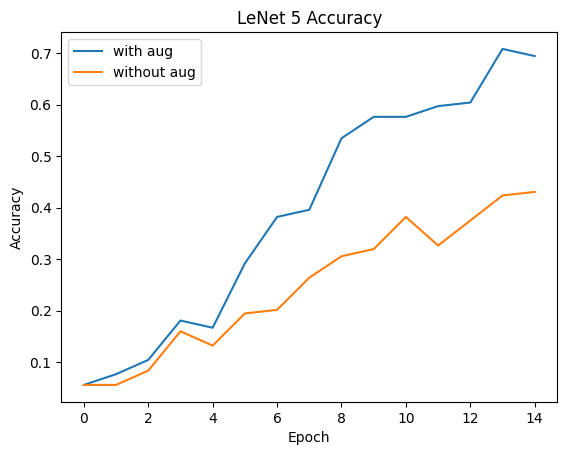

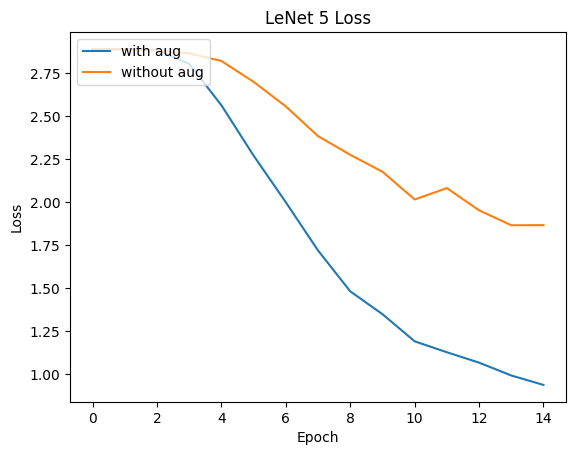

In [13]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Lenet_Aug.history['val_acc'])
plt.plot(history_nonAug.history['val_acc'])
plt.title('LeNet 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

plt.plot(history_Lenet_Aug.history['val_loss'])
plt.plot(history_nonAug.history['val_loss'])
plt.title('LeNet 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

In [14]:
def prediksi_dataset(path):
    x_predik=[]
    y_predik=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(64,64))
                img = ImOps.invert(img)
                img=img_to_array(img)
                img=img/255.0
                x_predik.append(img)
                y_predik.append(label)
    return np.array(x_predik),np.array(y_predik)

def get_classlabel(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
    classl = labels[class_code]
    
    return classl

In [15]:
x_predik, y_predik = prediksi_dataset('prediksi/')
print("Shape x_predik :",x_predik.shape)
print("Shape y_predik:", y_predik.shape)

Shape x_predik : (0,)
Shape y_predik: (0,)


In [16]:
def pred_dataset(path):
    x_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(64,64))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
    return np.array(x_train)

In [17]:
pred_img = pred_dataset('prediksi/')
pred_img.shape

(36, 64, 64, 3)

1/1 [==============================] - 0s 29ms/step


C:\Users\kiran\AppData\Local\Temp\ipykernel_17800\1010702959.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


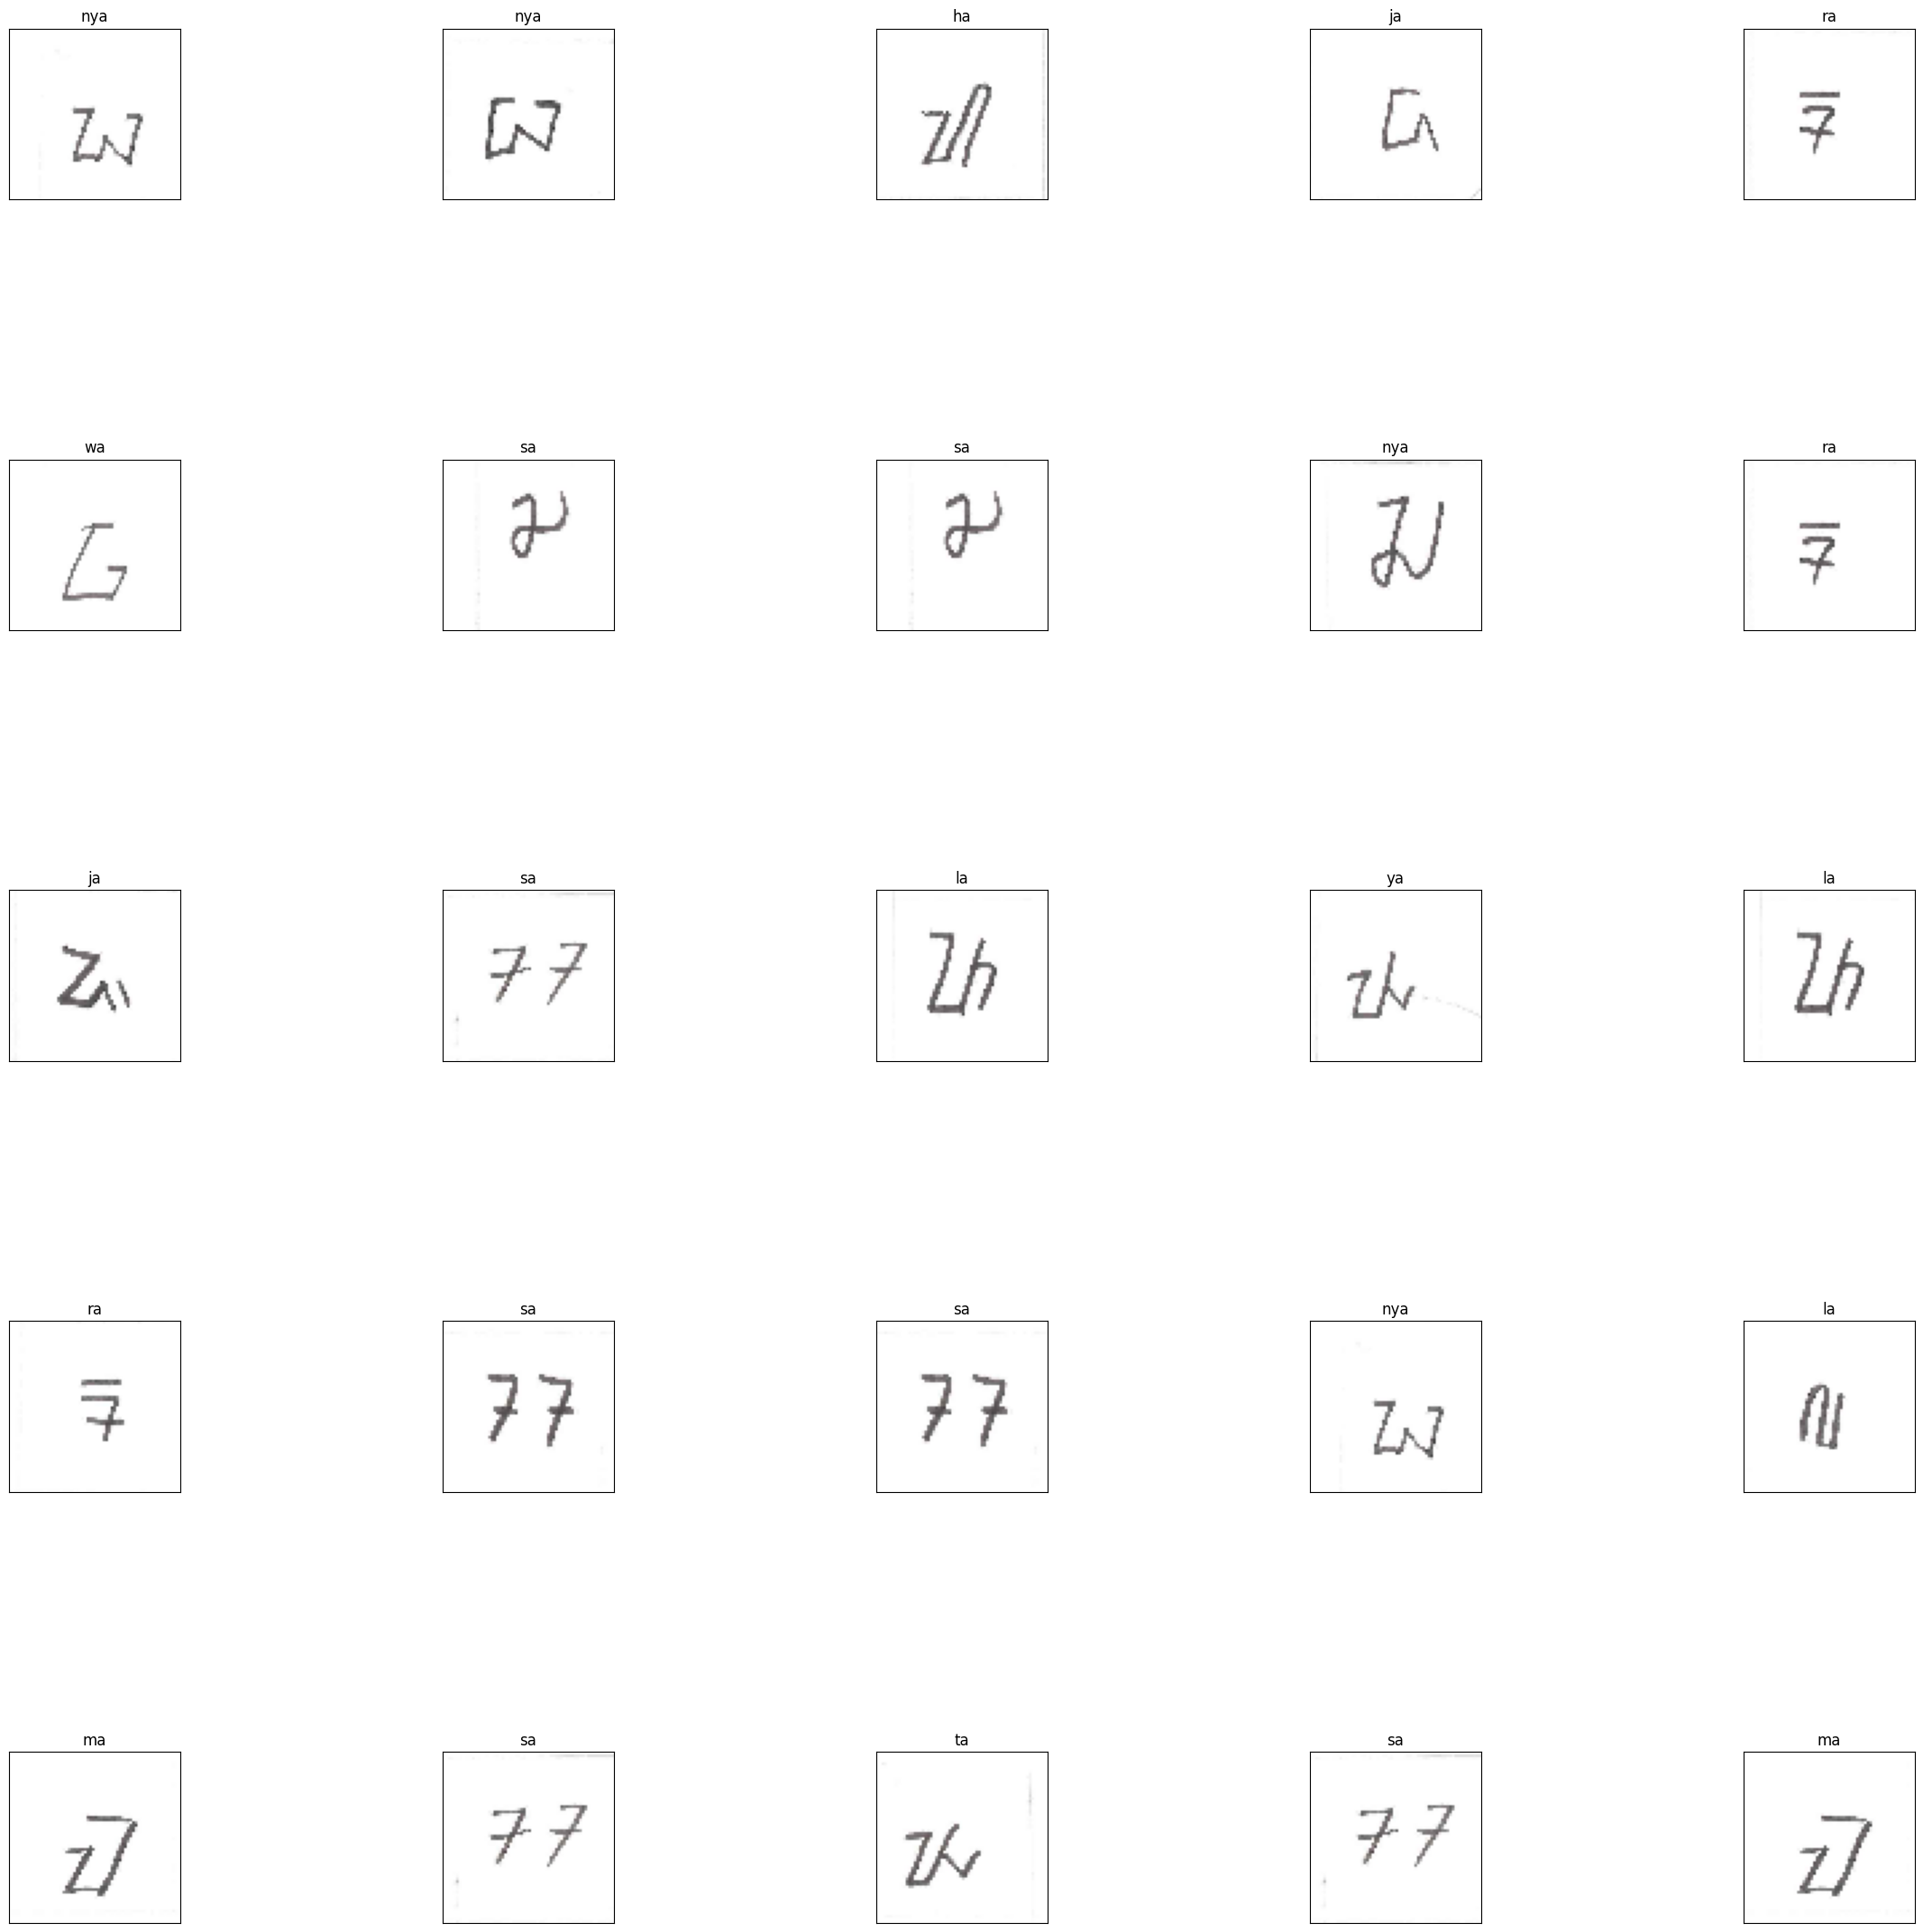

In [18]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from random import randint
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_img))
    pred_image = np.array([pred_img[rnd_number]])
    x = np.argmax(LeNet_Aug.predict(pred_image)[0])
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow((pred_image[0]*255).astype(np.uint8))
            ax.set_title(get_classlabel(x))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)


fig.show()

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

label = np.array([ 'ka','ca',  'ta',  'pa',  'ya',  'wa',  'ga',  'ja', 'da',
                  'ba',  'ra', 'sa', 'nga', 'nya', 'na', 'ma', 'la', 'ha'])

LnetAug_pred = LeNet_Aug.predict(x_predik)
LnetAug_pred = np.argmax(LnetAug_pred, 1) 

mat = confusion_matrix(y_predik,LnetAug_pred)
df_cm = pd.DataFrame(mat, label,label)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Greens")
plt.title('Confusion Matrix LeNet-5 (Data Augmentasi)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

from sklearn.metrics import accuracy_score
print("Akurasi yang didapat {:.3f} %".format(accuracy_score(y_pred, LnetAug_pred)))

ModuleNotFoundError: No module named 'sklearn'

Menyimpan weight untuk inmplementasi pada aplikasi Web

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(LeNet_Aug, 'models')